In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import util

In [2]:
train_path = "../data/ds5_train.csv"
valid_path = "../data/ds5_valid.csv"
test_path = "../data/ds5_test.csv"

In [8]:
class LWR:
    def __init__(self, train_path):
        self.X_train, self.y_train = util.load_dataset(train_path, add_intercept=True)

    def predict(self, x, tau):
        m, _ = self.X_train.shape
        X, y = self.X_train, self.y_train

        W = np.diag(np.array([(1/2) * np.exp(
            -np.linalg.norm(X[i] - x) / (2 * tau * tau)
        )  for i in range(m)]))

        theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        return x @ theta

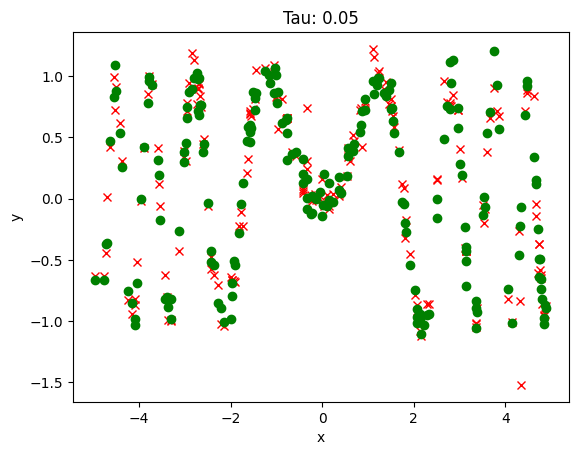

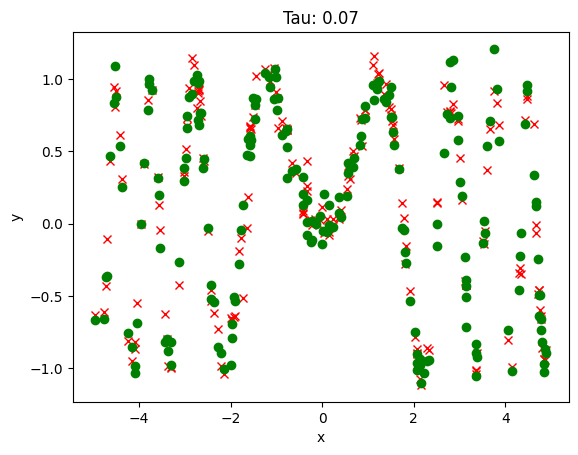

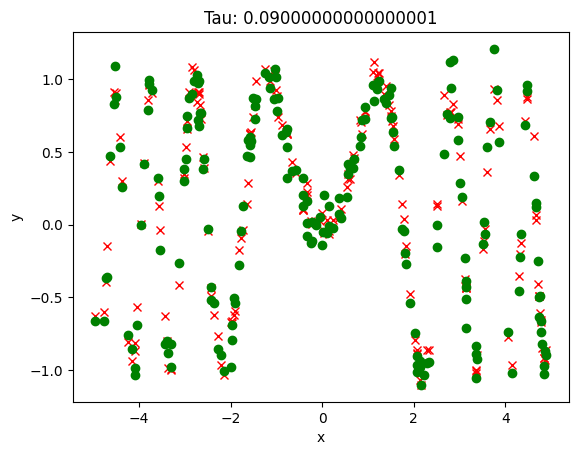

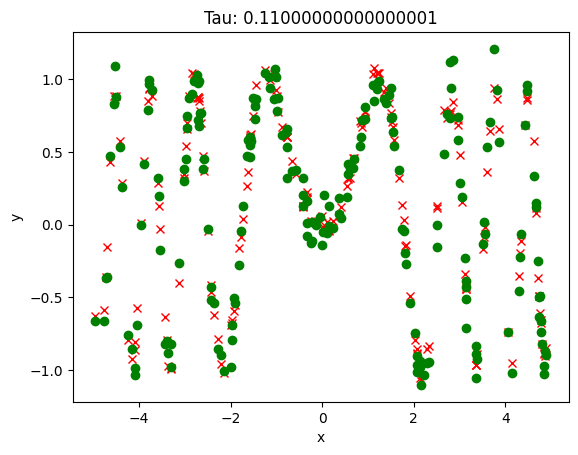

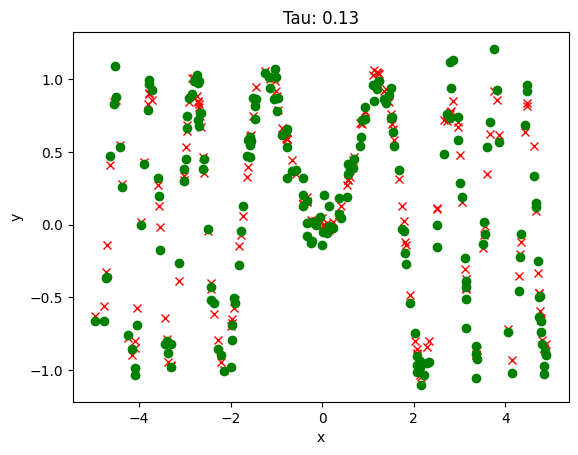

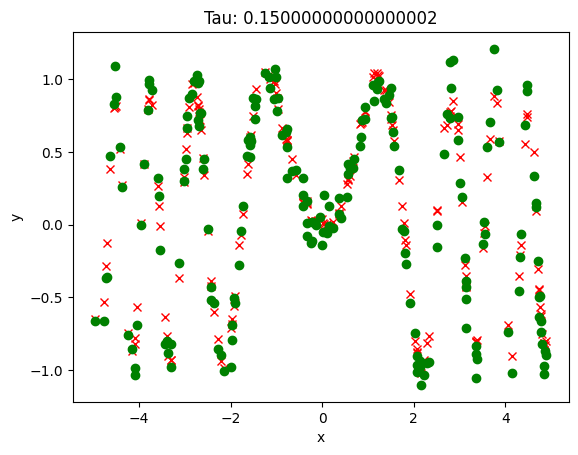

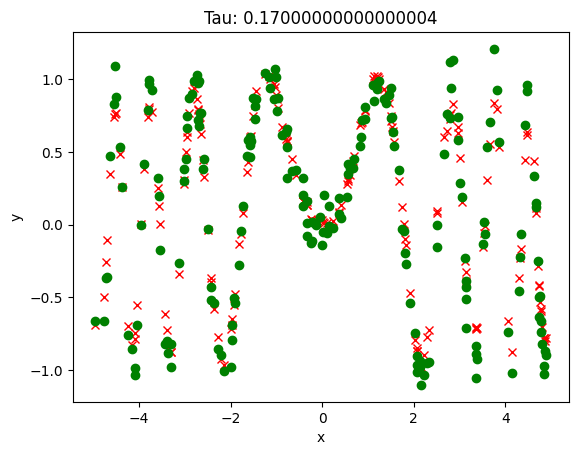

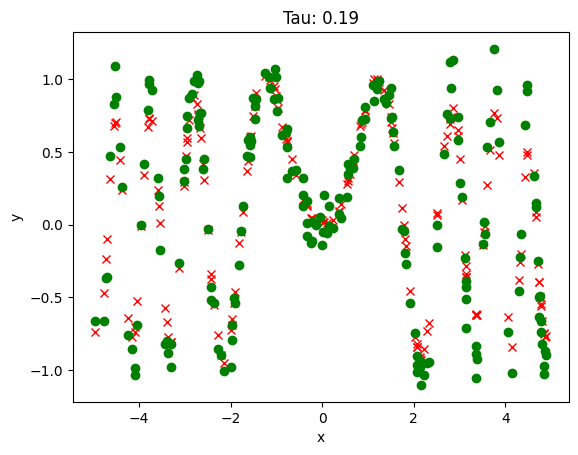

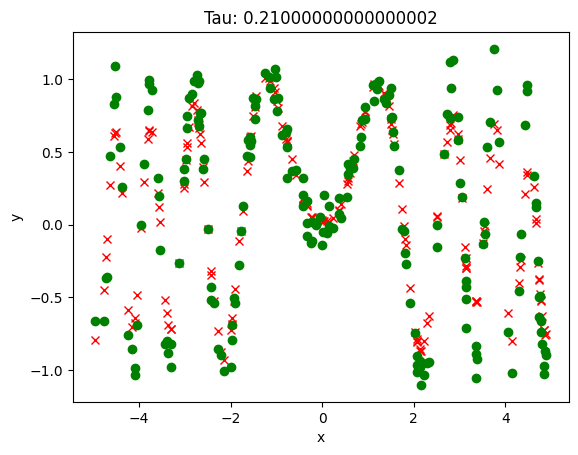

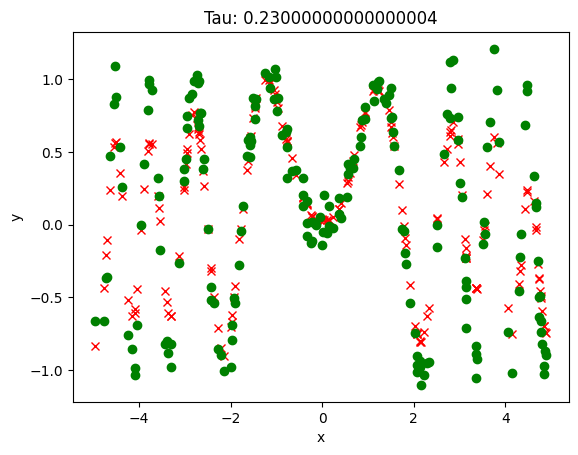

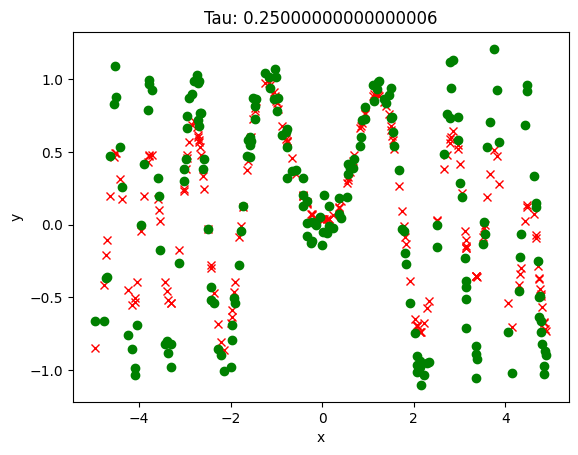

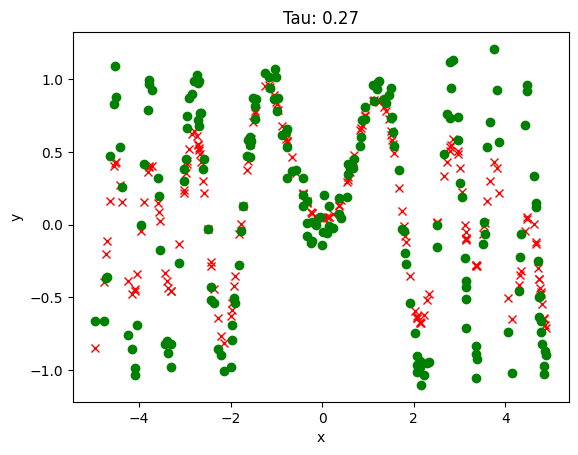

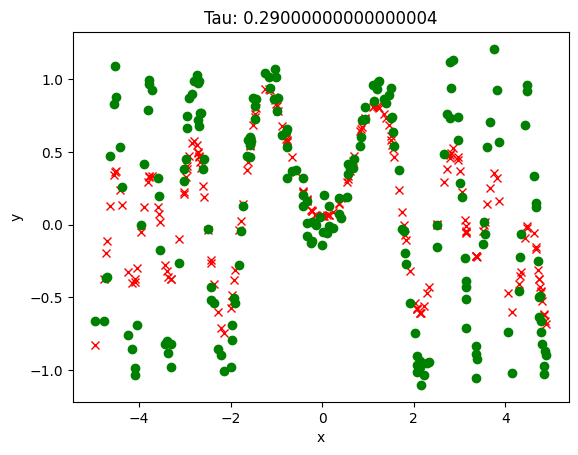

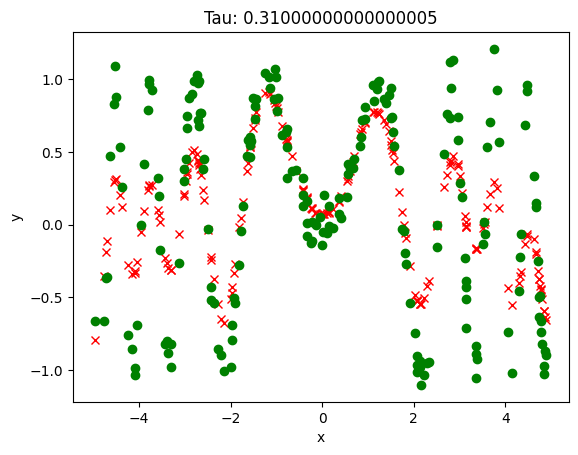

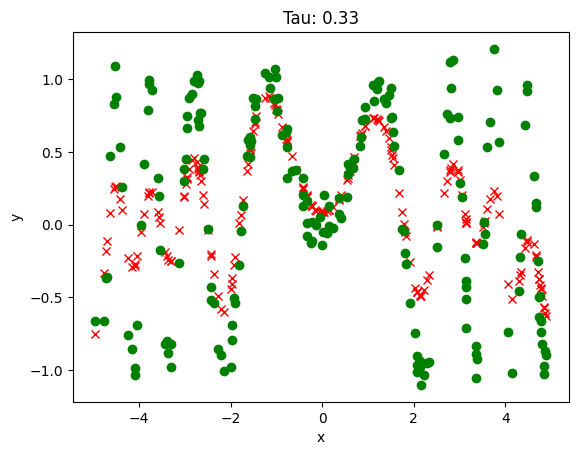

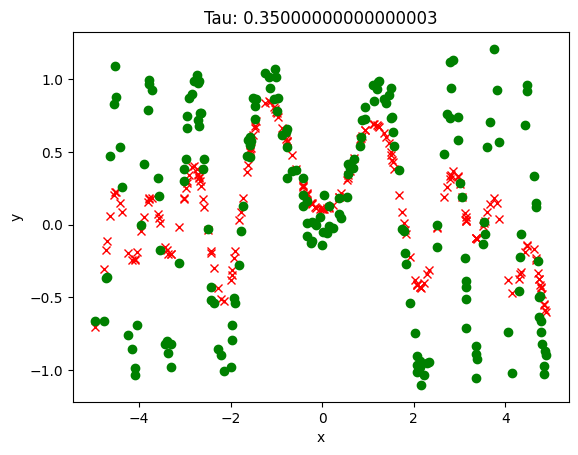

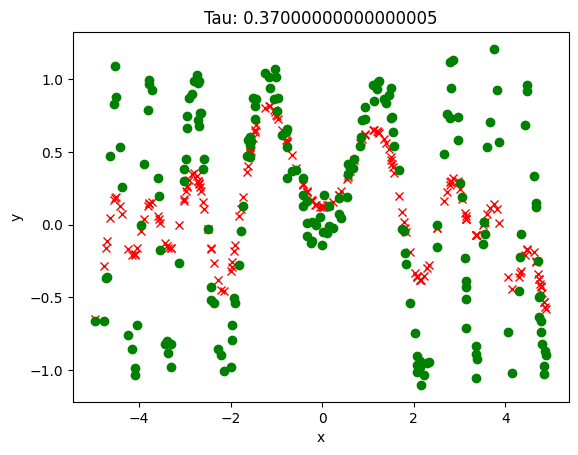

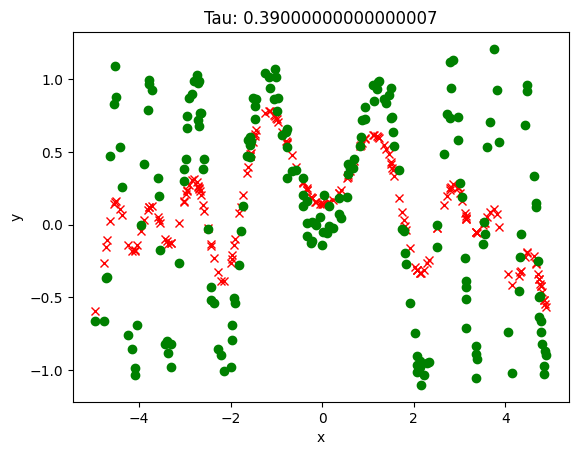

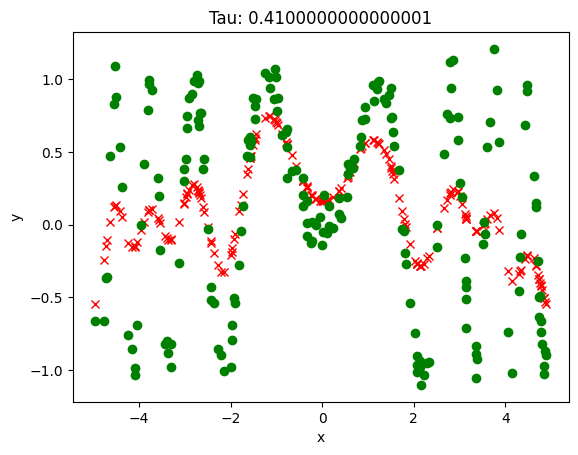

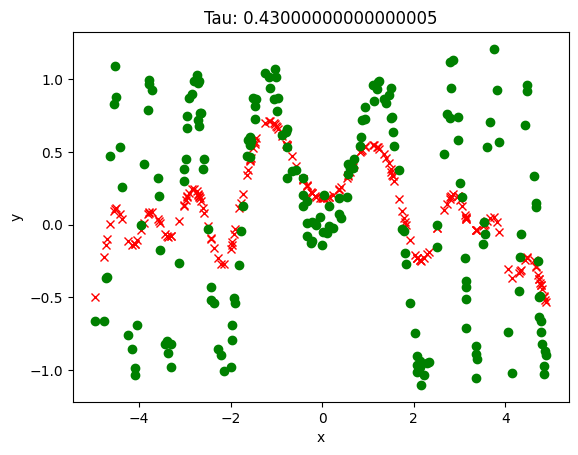

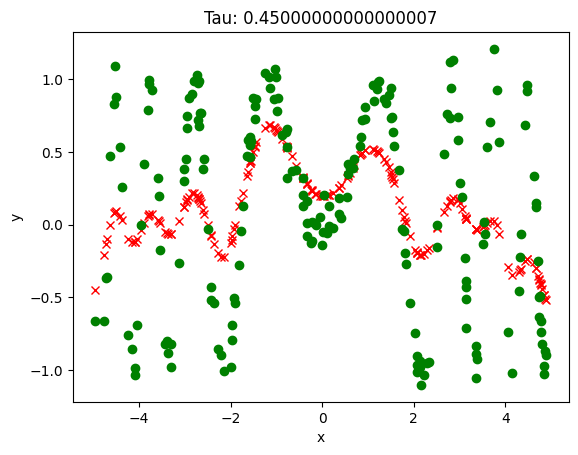

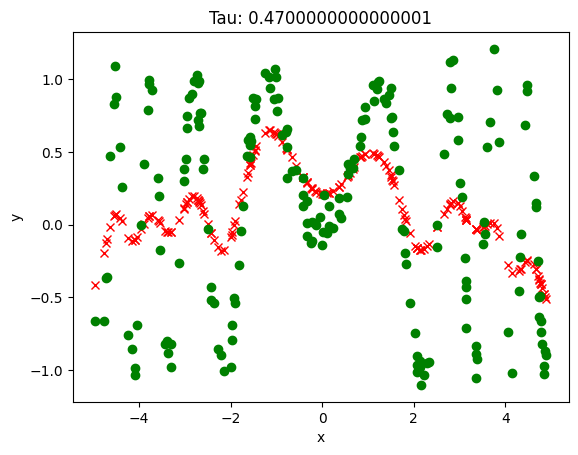

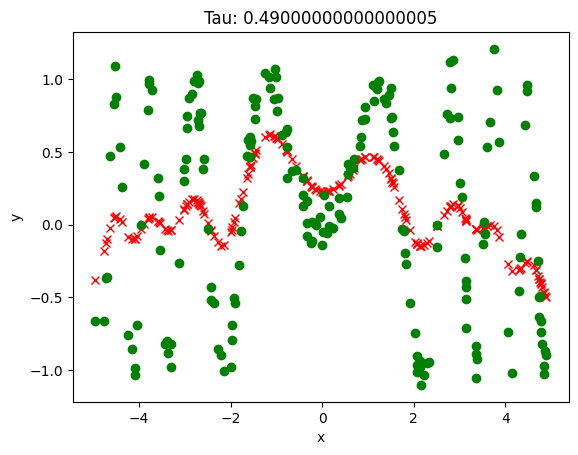

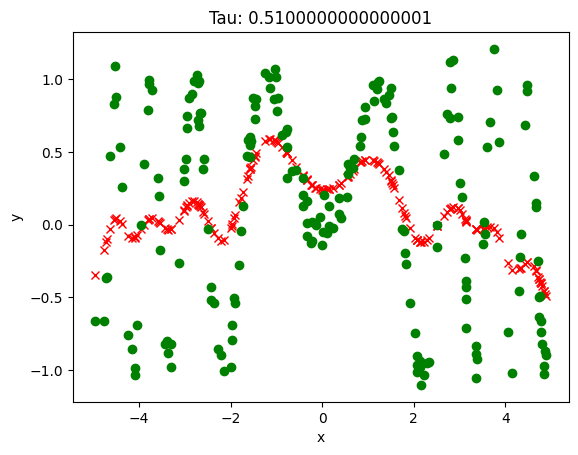

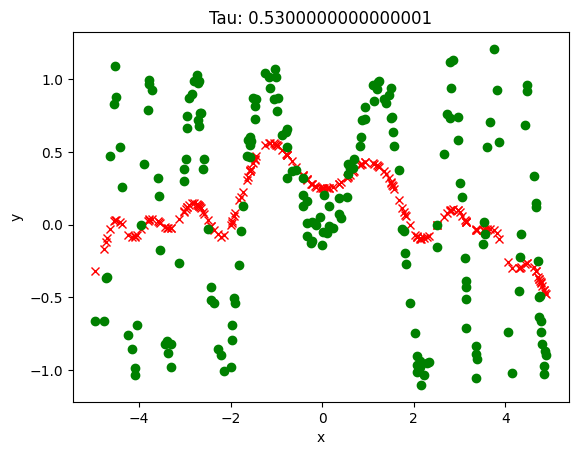

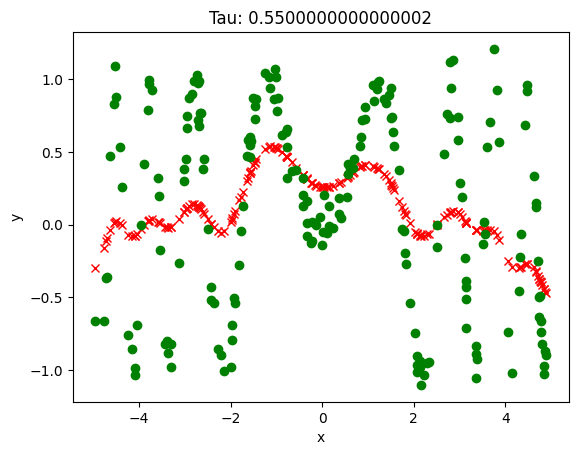

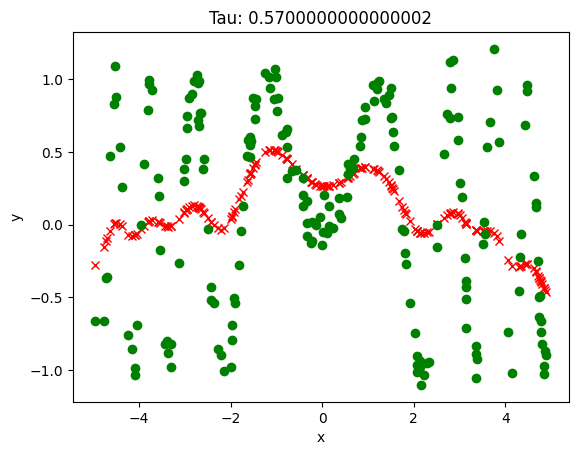

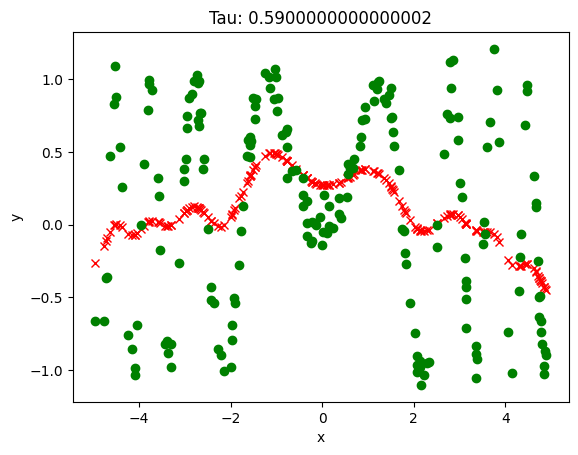

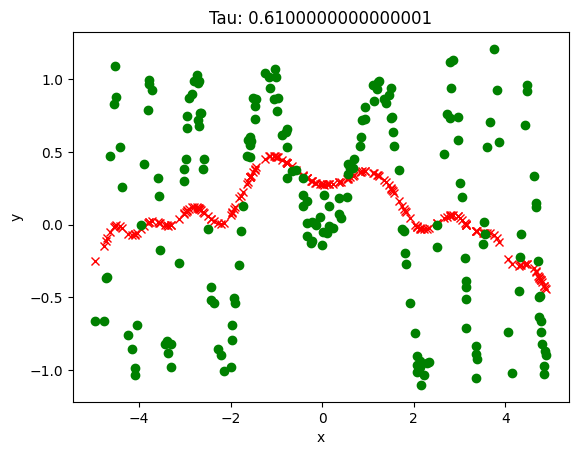

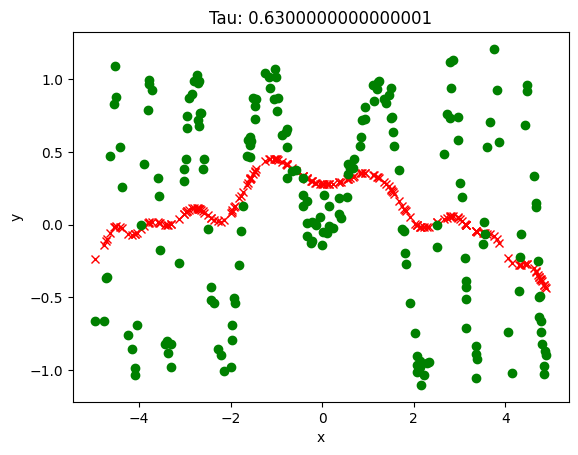

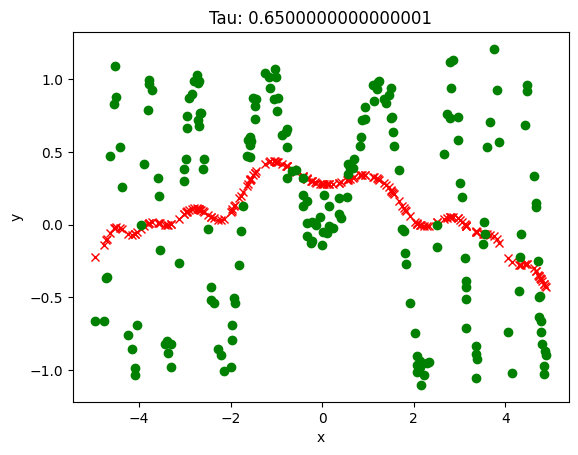

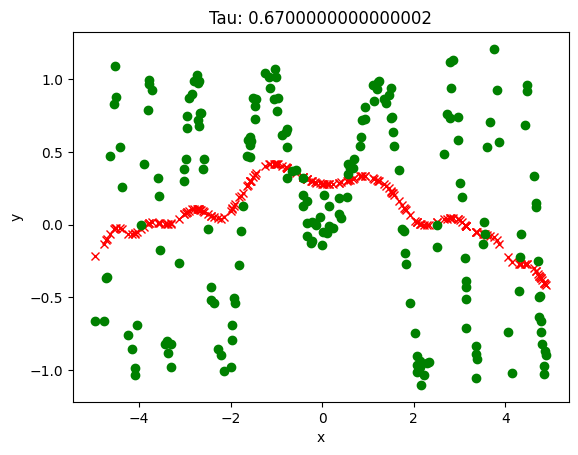

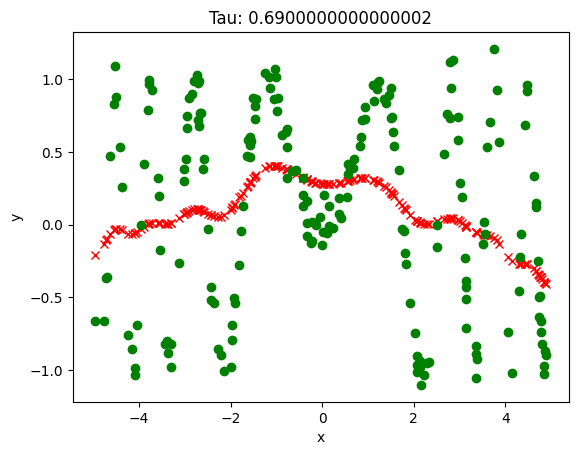

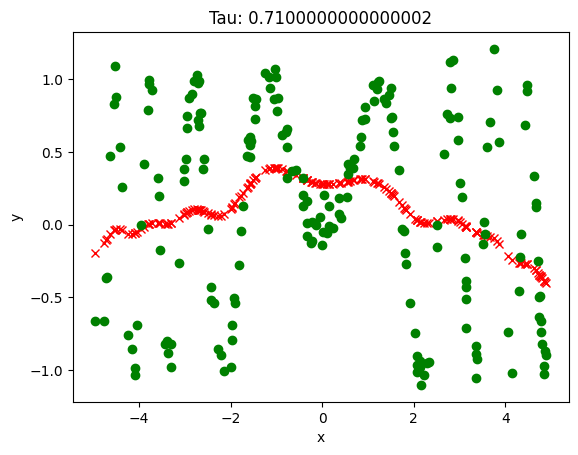

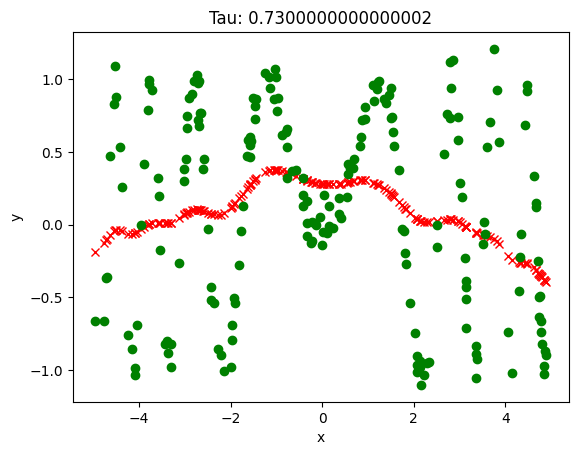

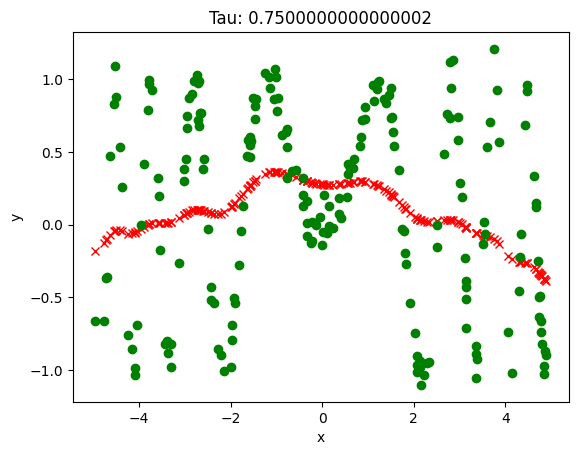

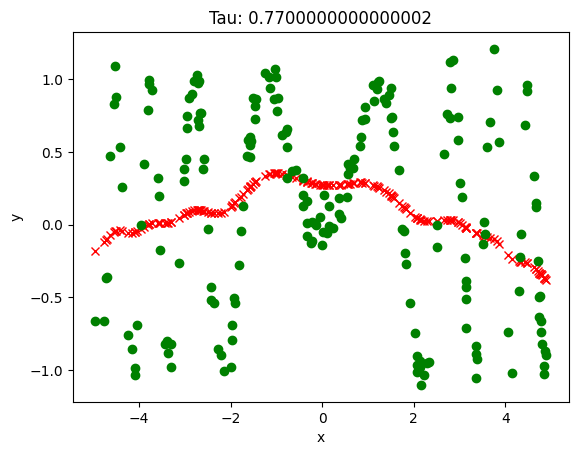

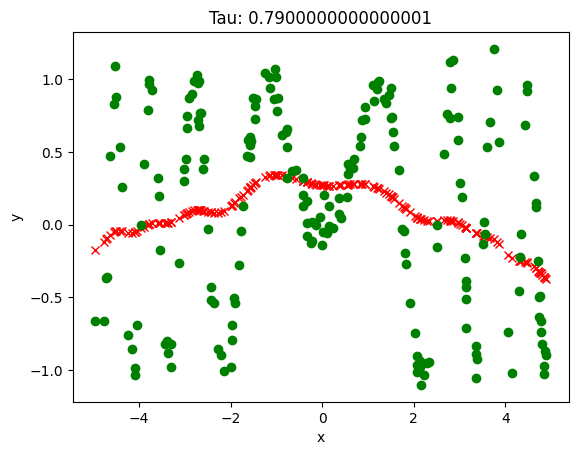

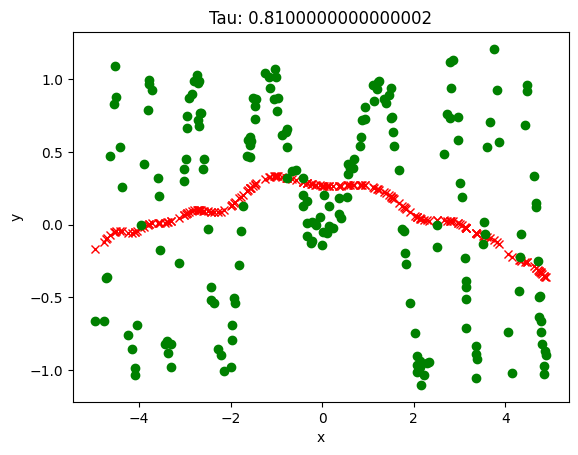

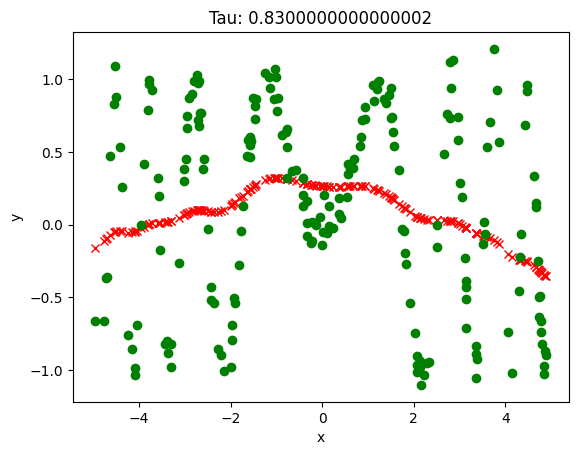

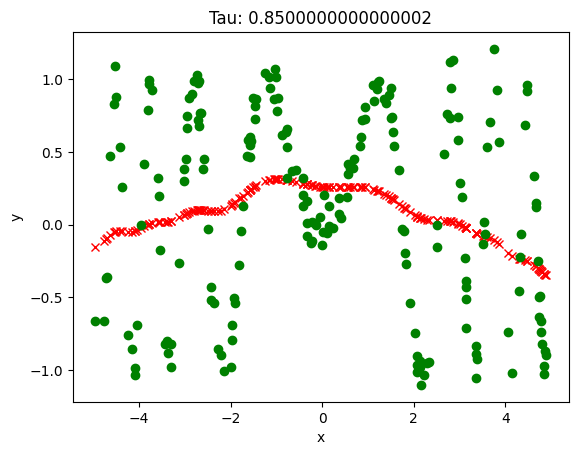

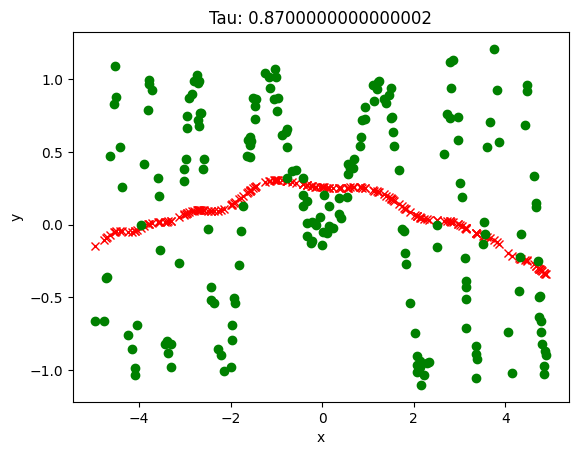

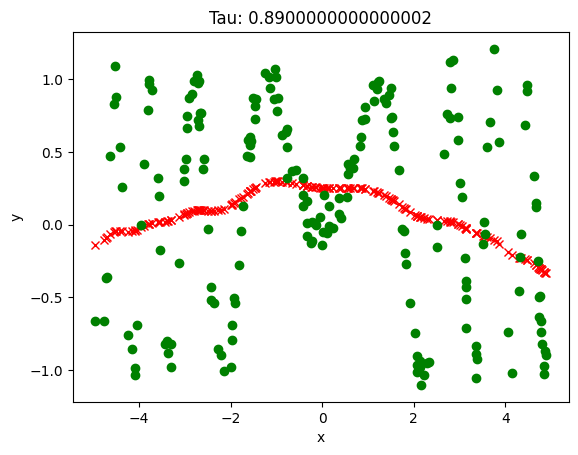

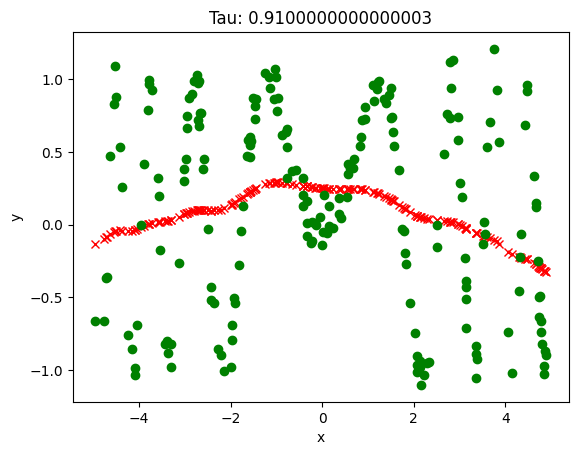

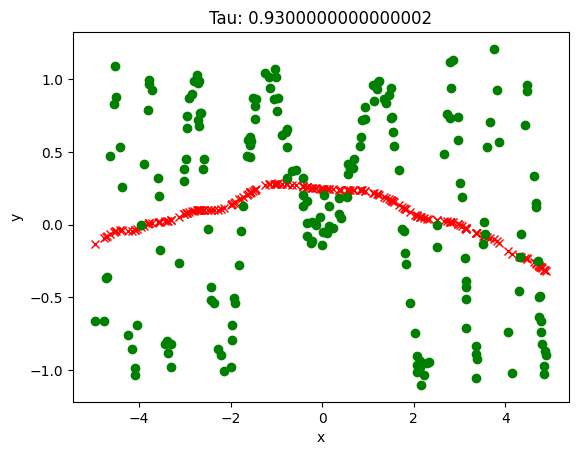

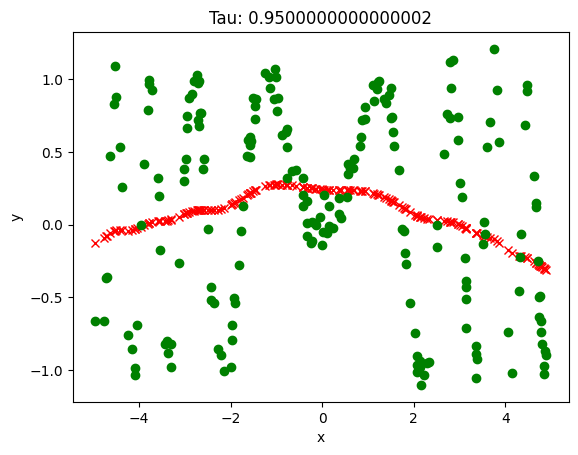

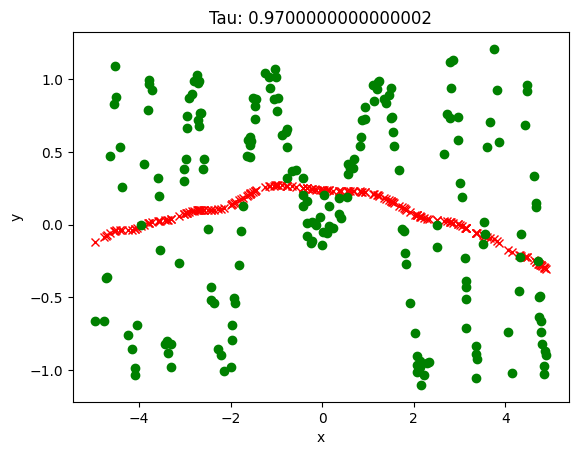

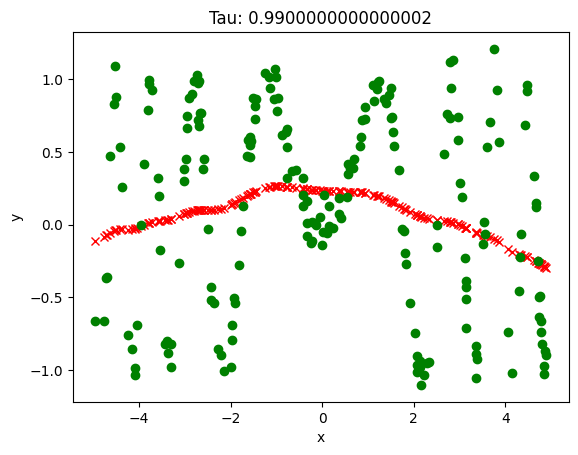

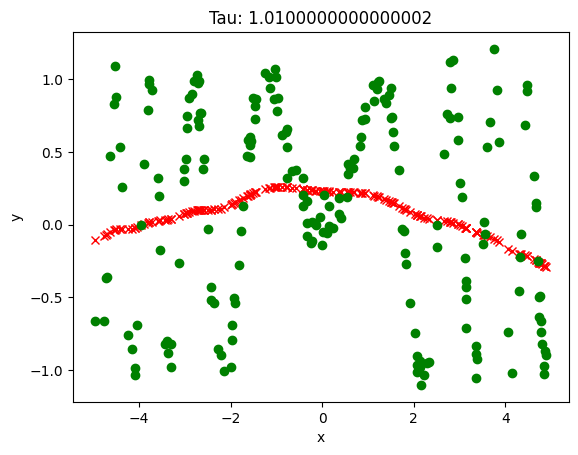

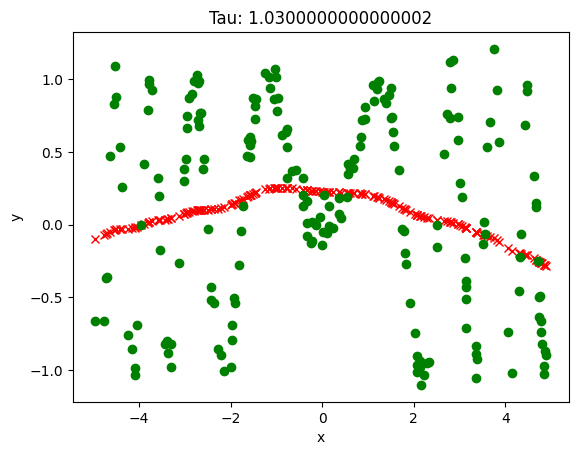

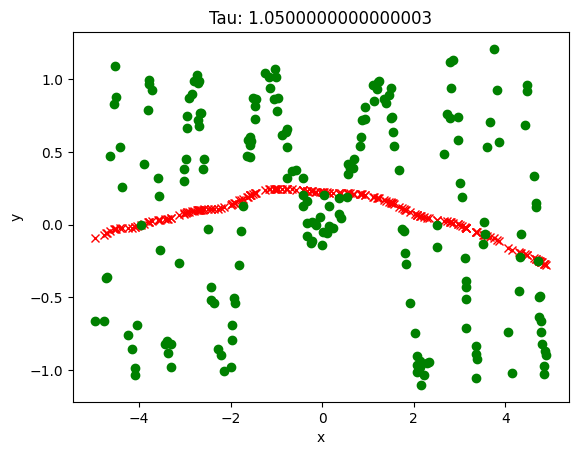

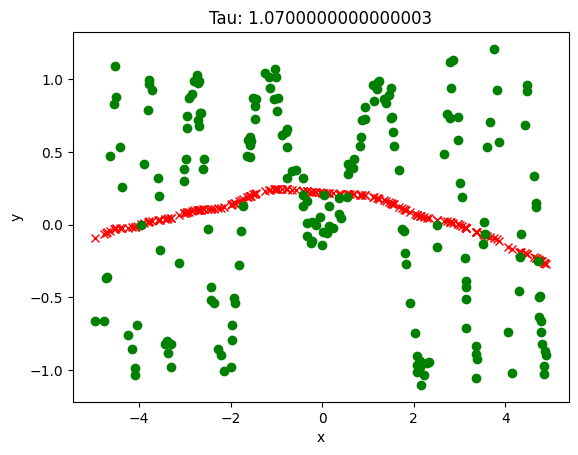

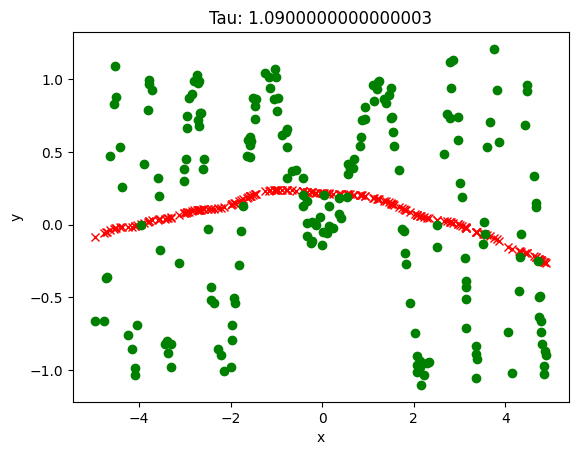

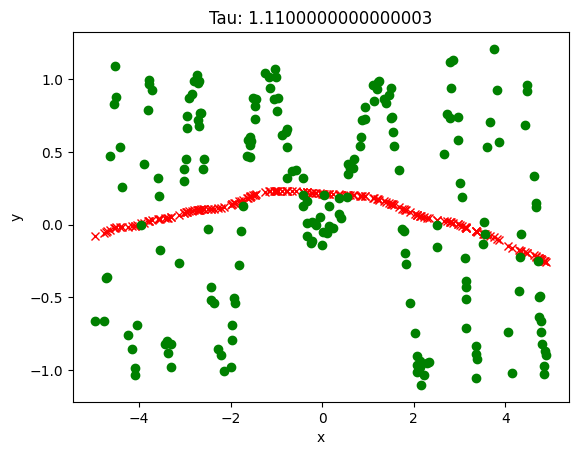

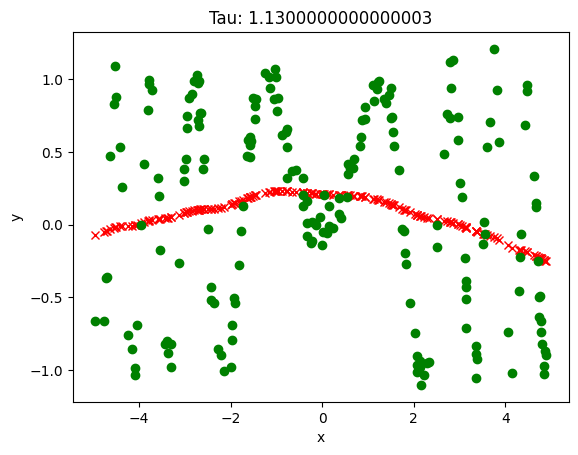

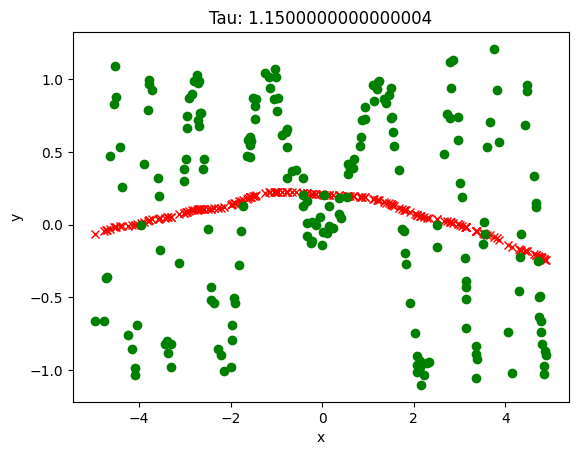

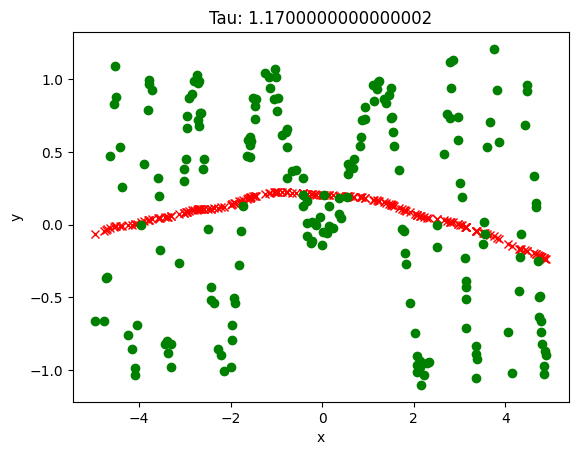

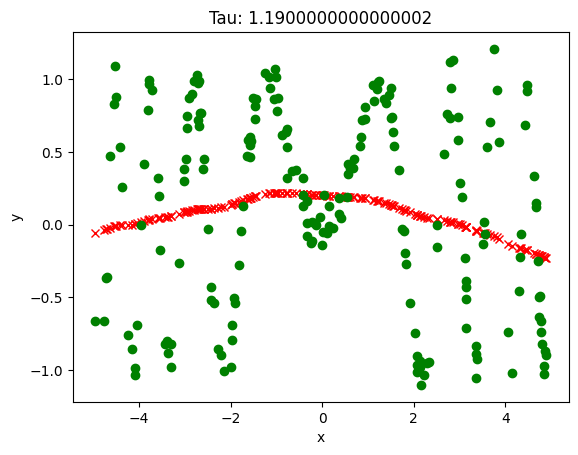

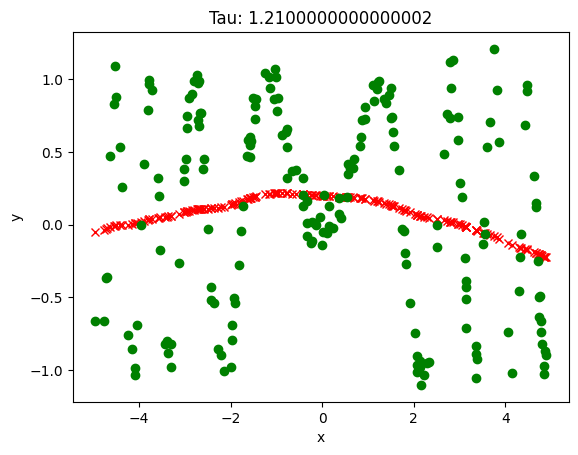

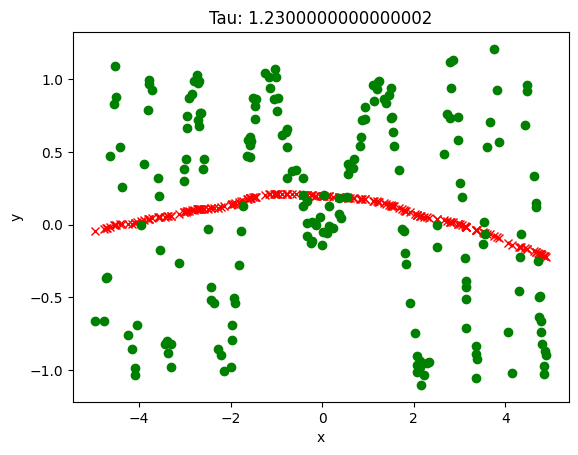

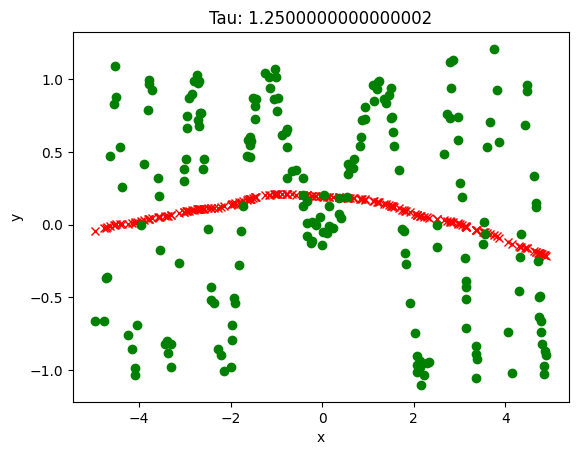

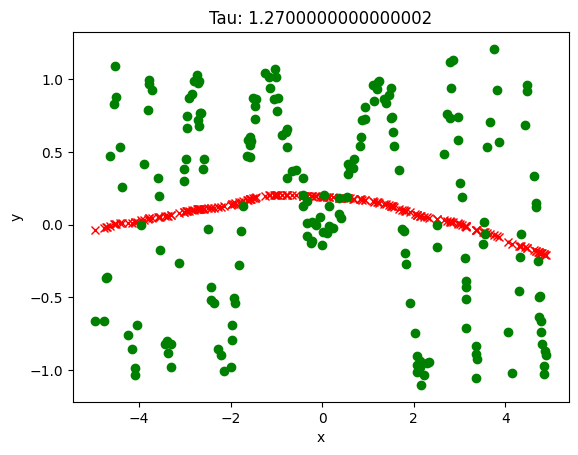

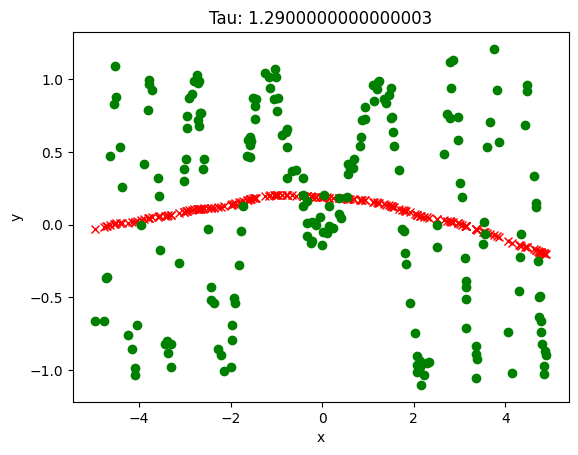

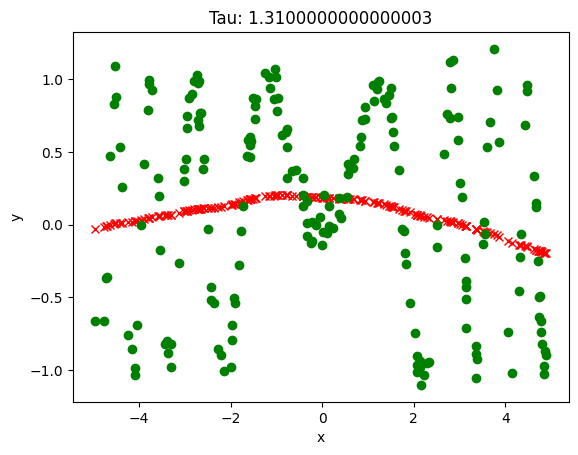

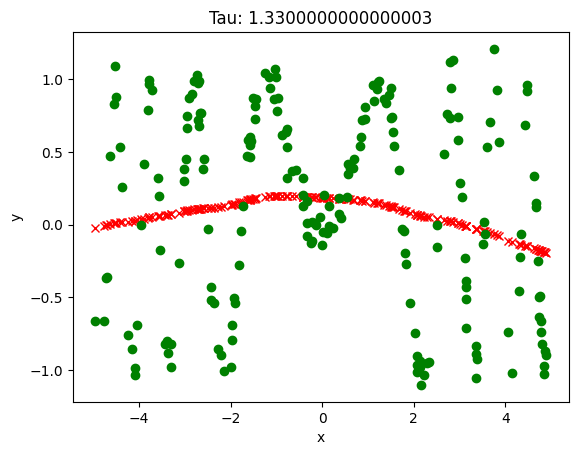

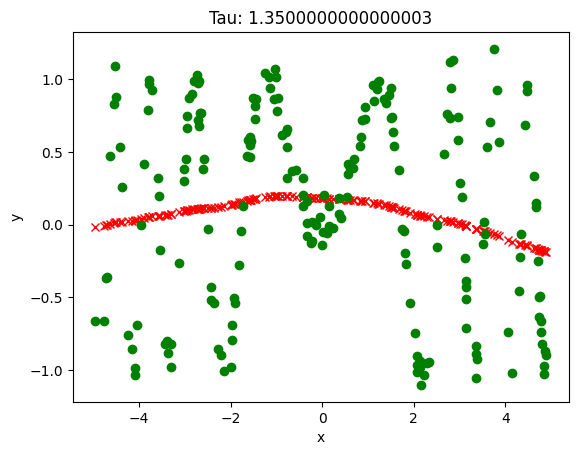

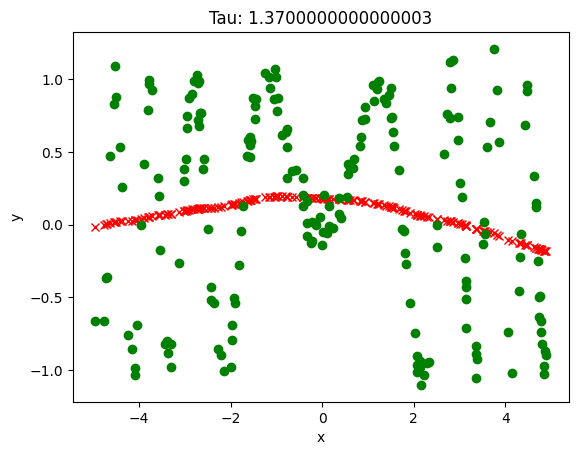

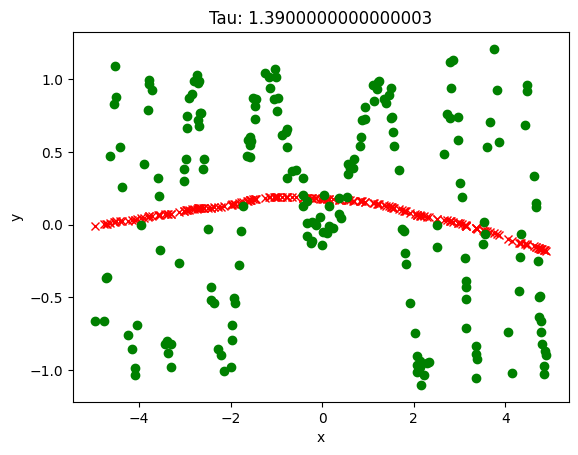

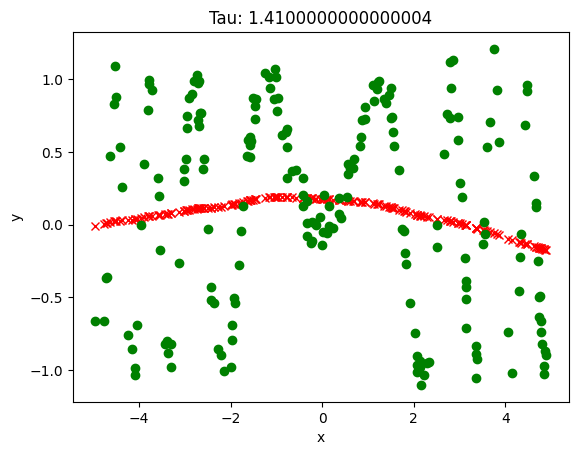

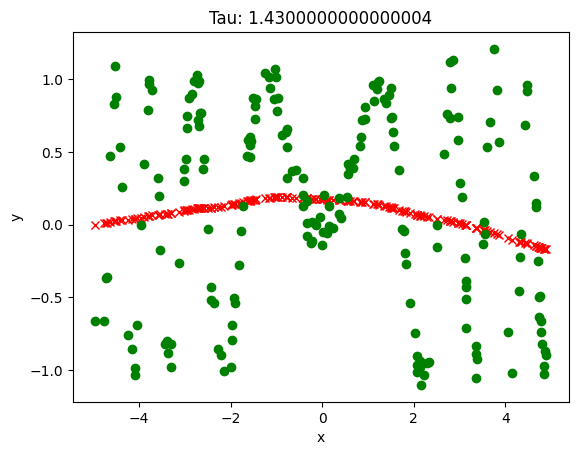

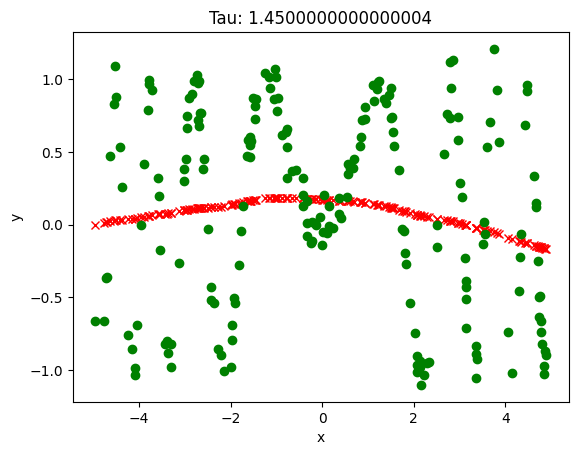

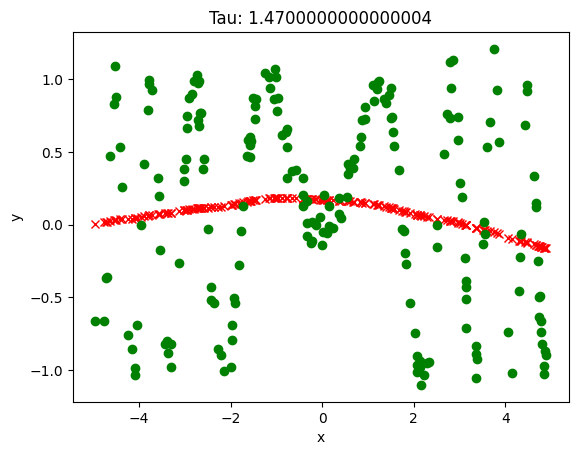

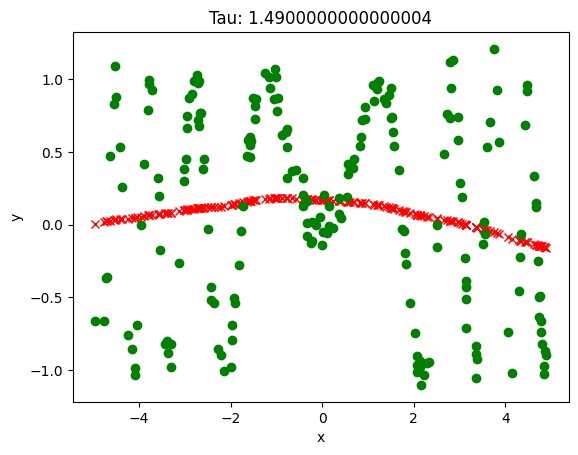

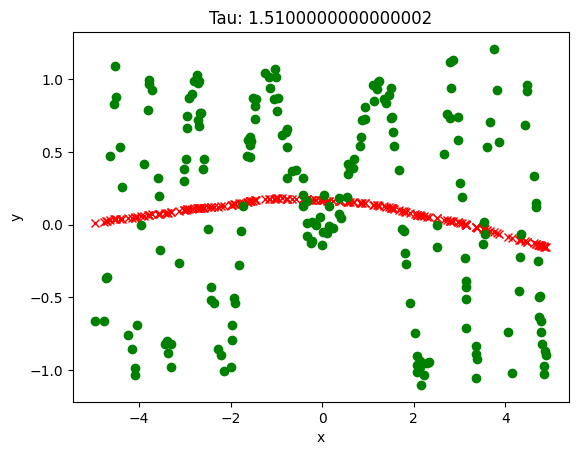

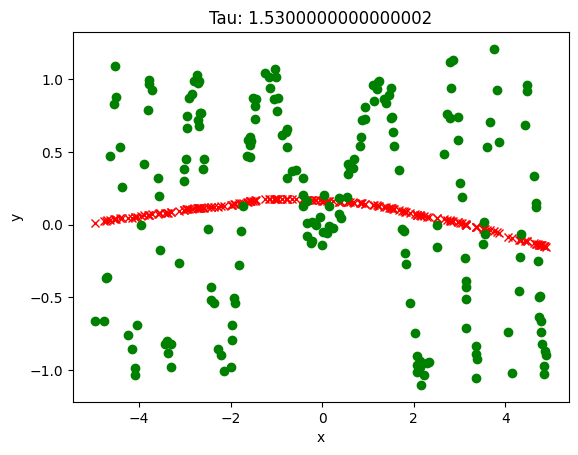

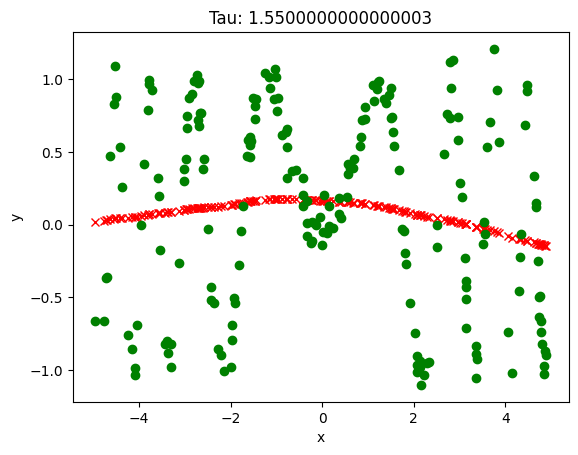

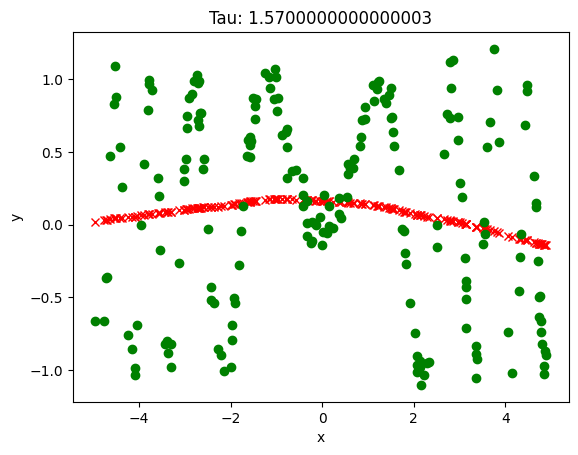

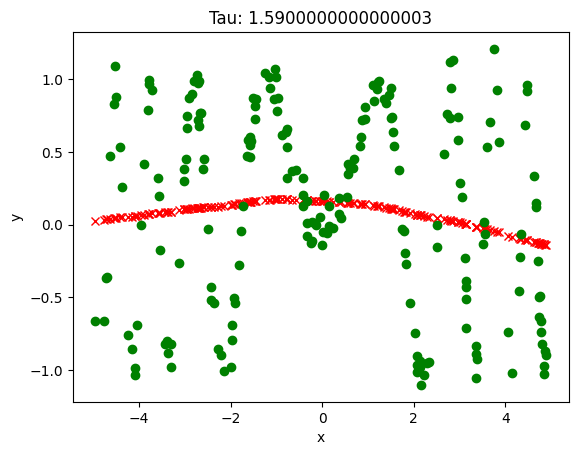

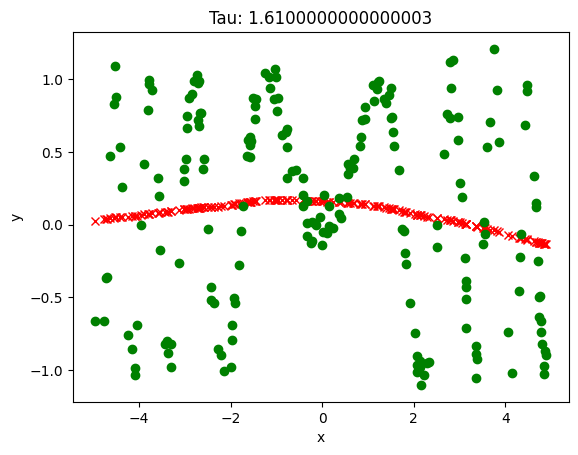

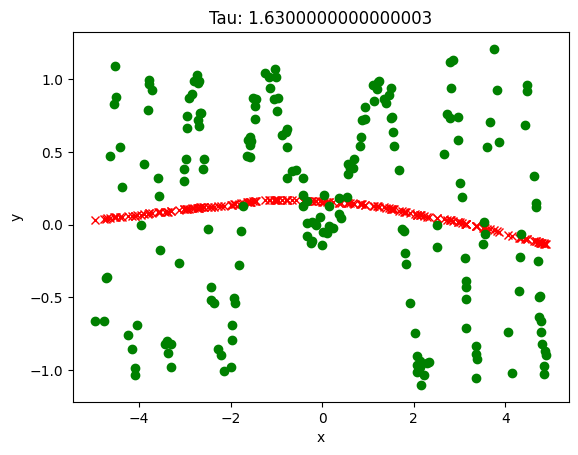

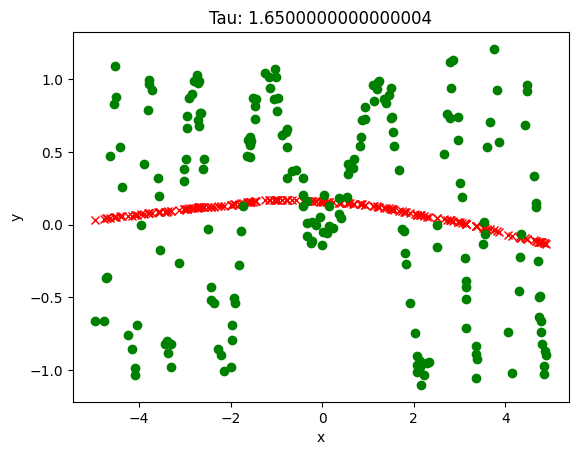

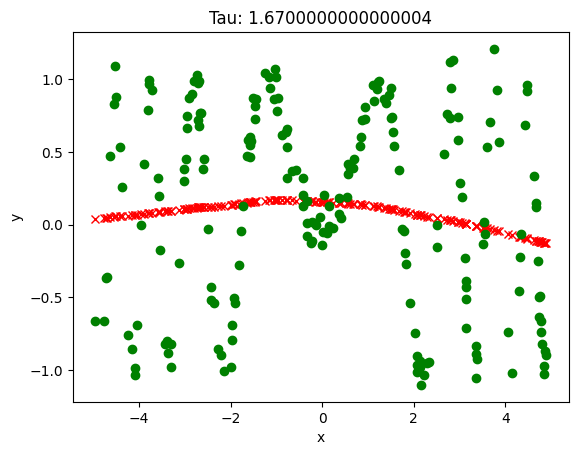

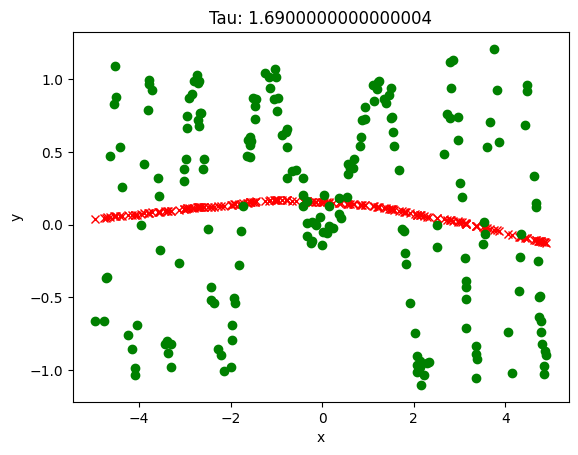

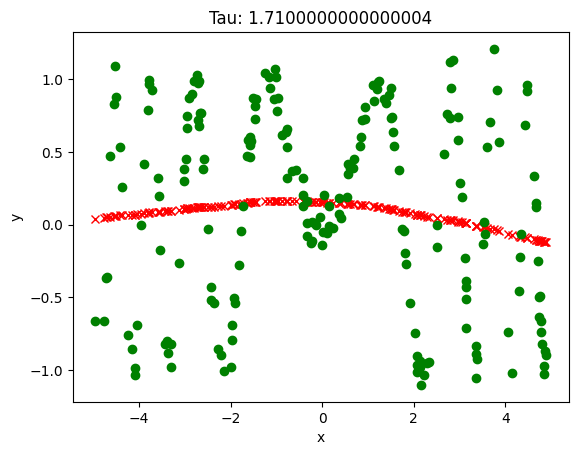

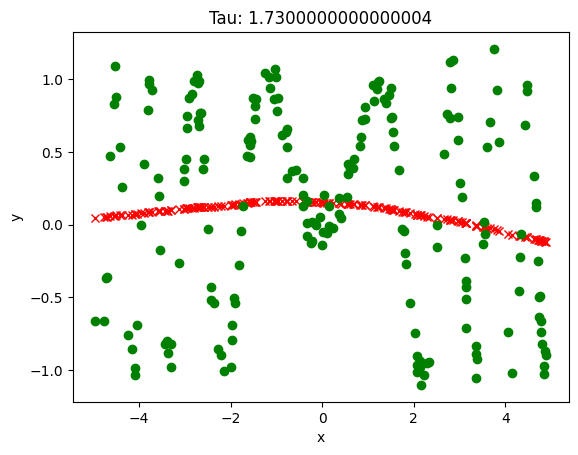

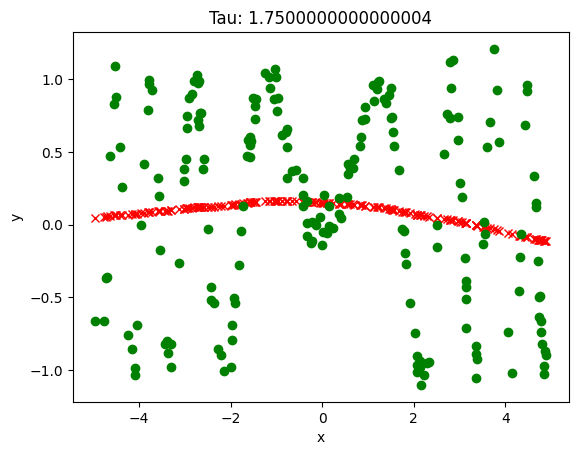

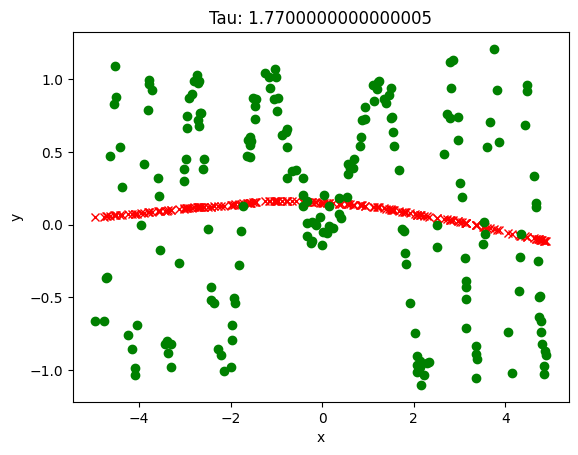

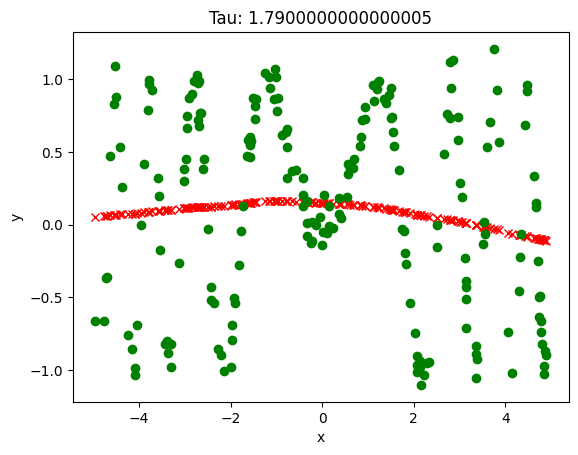

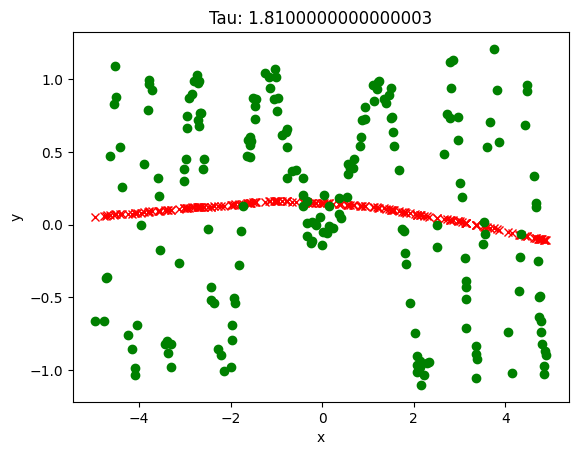

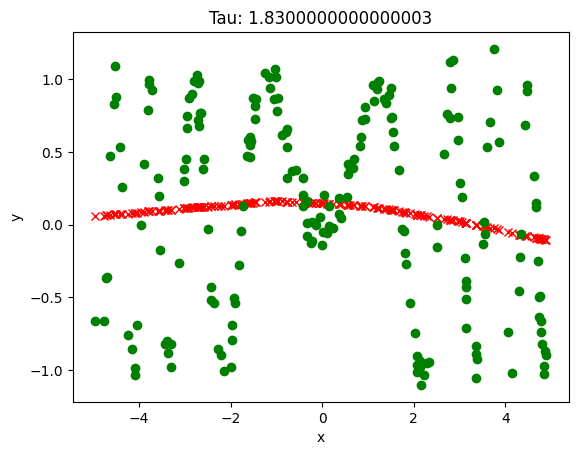

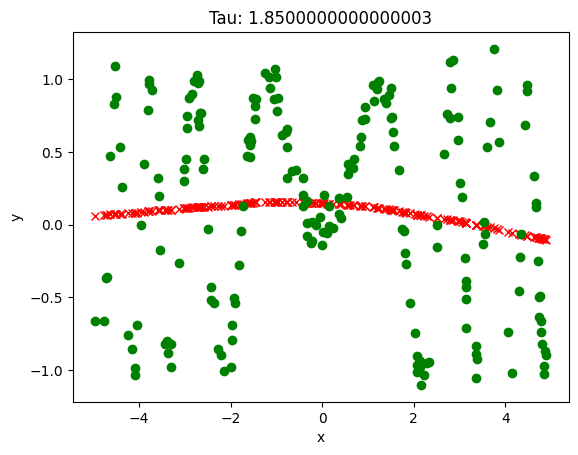

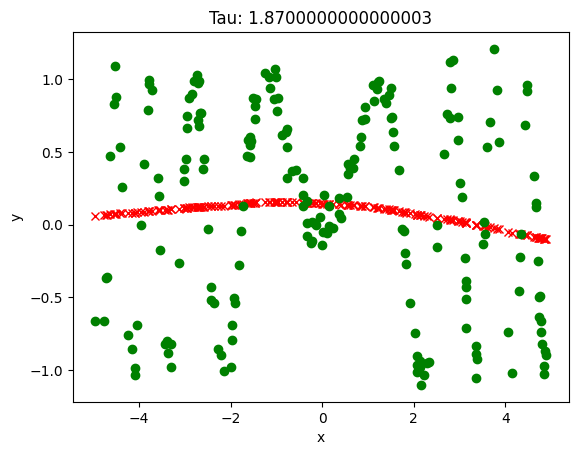

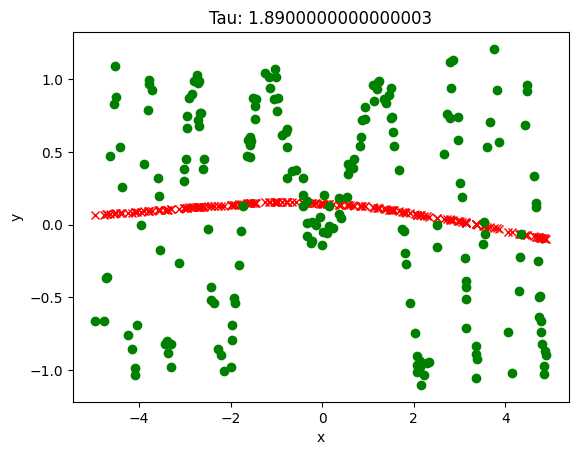

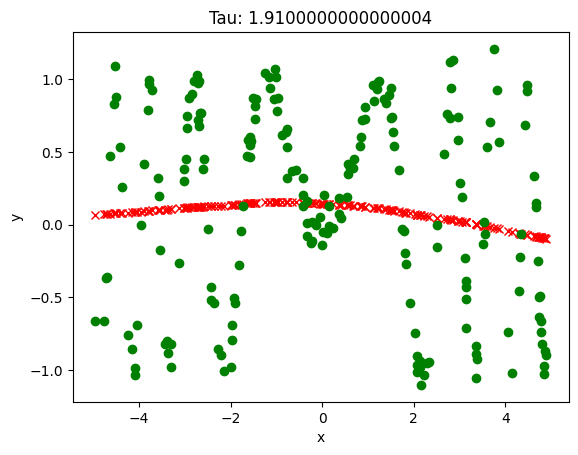

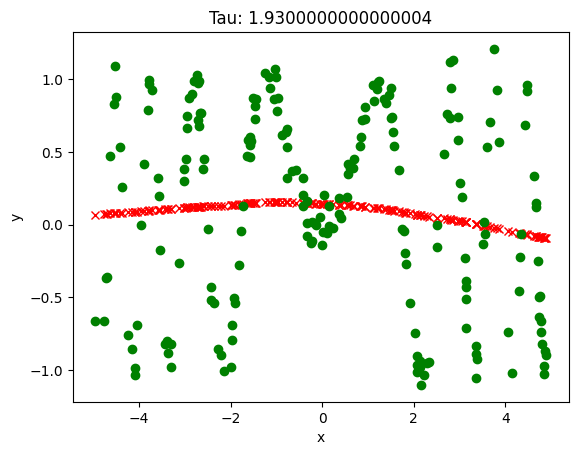

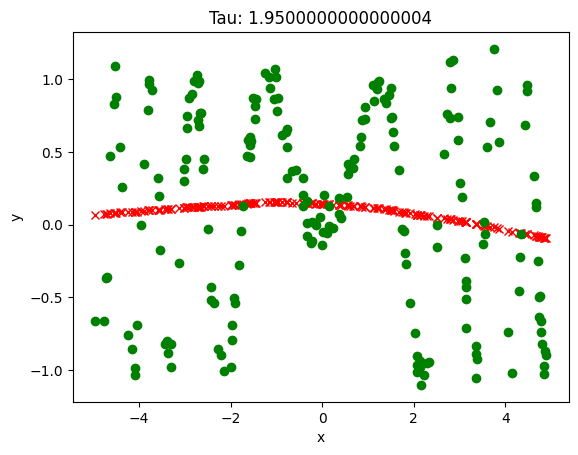

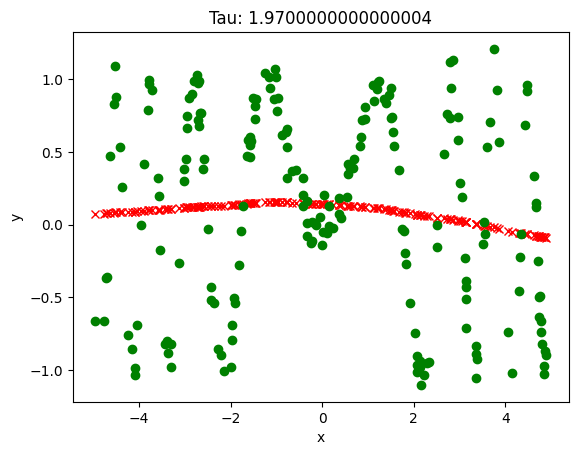

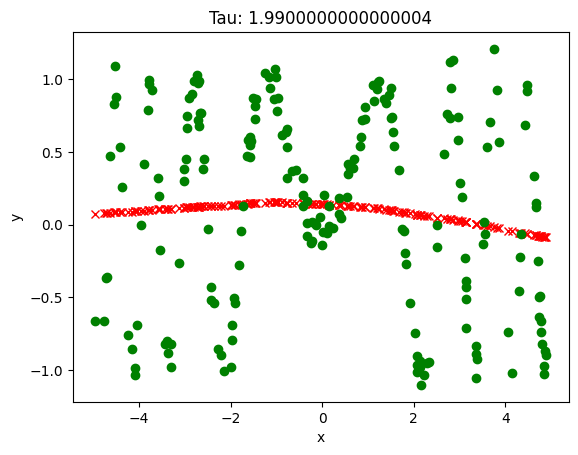

In [25]:
lwr = LWR(train_path)
X_valid, y_valid = util.load_dataset(valid_path, add_intercept=True)
m, _ = X_valid.shape
possible_taus = np.arange(0.05, 2, 0.02)
min_mse = None
best_tau = None

for tau in possible_taus:
    predictions = np.array([lwr.predict(X_valid[i], tau) for i in range(m)])
    mse = np.linalg.norm(predictions - y_valid)

    if min_mse is None or mse < min_mse:
        min_mse = mse

    if best_tau is None or mse < min_mse:
        best_tau = tau

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Tau: {tau}")
    plt.plot(X_valid[:, 1], predictions, "xr")
    plt.plot(X_valid[:, 1], y_valid, "og")
    plt.show()

In [27]:
best_tau

0.05

In [28]:
min_mse

1.5576356754458194

In [32]:
X_test, y_test = util.load_dataset(test_path, add_intercept=True)
predictions = np.array([lwr.predict(X_test[i], 0.17) for i in range(m)])
mse = np.linalg.norm(predictions - y_test)
mse

2.0741214642067436